# Pipeline : 
### data processing of the manually annoted dataset
### image processing : extraction of RGB volumes
### classifier based on WND-charm Model
### PCA & RDF
### Build a classifier
### Analyse False Positives
### Prediction of Neurons, Astrocytes, Background in ROI's clone

In [1]:
import numpy as np
import pandas as pd
from functools import partial
import multiprocessing
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as cm
import pickle
import time
from pandas import DataFrame, read_csv,concat,merge

In [2]:
%run ./configure.ipynb

In [3]:
%run ../Connection_to_server.ipynb

In [31]:
imageId = 462 #451
weight=25
height=25

## Pre-pocessing of the manually annotated Dataset

In [5]:
import Pre_Processing_the_annotated_dataset as pp
reload(pp);
import Add_tiles_to_dataFrame as Adt
reload(Adt);

In [6]:
dfpoints1=read_csv(projectpath+'io/Input/Bloc01_pointes_first_mod.csv')


In [7]:
dfpoints11=pd.read_pickle(projectpath+'io/Output/dfpoints11.pkl')

In [14]:
# Bloc 2
dfpoints2=read_csv(projectpath+'io/Input/Bloc02_pointes_second.csv')

In [17]:
dfpoints22=pd.read_pickle(projectpath+'io/Output/dfpoints22.pkl')

In [21]:
import Pre_Classification_process as pcp
reload(pcp);

In [23]:
filename_Features_bloc1=projectpath+'io/Output/Features_bloc1.npy'

In [25]:
Features_bloc1=np.load(filename_Features_bloc1)

In [27]:
Data_FRAMES_bloc1=pd.read_pickle(projectpath+'io/Output/Data_FRAMES_bloc1.pkl')

In [33]:
filename_Features_bloc2=projectpath+'io/Output/Features_bloc2.npy'

In [35]:
Features_bloc2=np.load(filename_Features_bloc2)

In [38]:
Data_FRAMES_bloc2.shape

(6662, 18)

In [37]:
Data_FRAMES_bloc2=pd.read_pickle(projectpath+'io/Output/Data_FRAMES_bloc2.pkl')

# Create the full data Frame ( 1135 Adtrocytes, 1135 Neurons, 1151 background) 

In [39]:
import join_two_blocs as jt
reload(jt);
import Fonctions_used_for_many_DF_pre_processing as fct_pp
reload(fct_pp);

In [42]:
Data_FRAMES=pd.read_pickle(projectpath+'io/Output/Dataframe_.pkl')

In [43]:
filename_Features_two_blocs=projectpath+'io/Output/Features_two_blocs.npy'

In [45]:
Features_two_blocs=np.load(filename_Features_two_blocs)

# PCA & Random Forest Classification

/home/tbacoyannis/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/tbacoyannis/.local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Pipeline(steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=90, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('Random_Forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=...stimators=200, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False))])


<IPython.core.display.Javascript object>


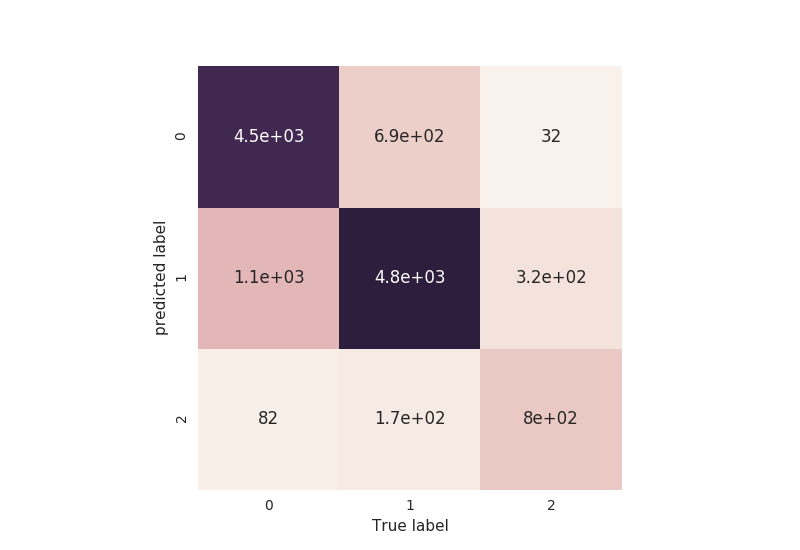

CPU times: user 49min 1s, sys: 1h 7min 26s, total: 1h 56min 27s
Wall time: 34min 14s


In [48]:
%%time
%run ./pca_rdf_models.ipynb
#%run ./Pipeline_PCA_RANDOM_Forest_Copy1.ipynb
# CPU times: user 49min 1s, sys: 1h 7min 26s, total: 1h 56min 27s
#Wall time: 34min 14s

# Imshow specific images to understand non differentiation in PCA model

# process in order to display false predicted images

In [ ]:
(fail_img_pred_Neurons,fail_img_pred_Astrocytes,fail_img_pred_Background)=imf.Get_IMG_failed_prediction(yr,predictedVAL)

In [ ]:
sns.reset_orig() # sns.set()

# test prediction sur  1 clone

In [49]:
import Get_coordinates as gC
reload(gC);

In [50]:
conn = BlitzGateway('tbacoyannis','d33pl34rn1ng',port=4064,host='chinensis.polytechnique.fr')
connected = conn.connect()

image = conn.getObject("Image", imageId)
pixels = image.getPrimaryPixels() # get raw pixels information

size_x=image.getSizeX()
size_y=image.getSizeY()
size_z = image.getSizeZ()
size_c = image.getSizeC()
size_t = image.getSizeT()

large= weight  
nidY=size_x/(int(large/int(large/2)))-3
delta_x=2
z=103

In [60]:
# Coordinates of the ROI in the original image
x_min=48+367
y_min=2064+646
w=615-367
h=920-646
x_max=x_min+w
y_max=y_min+h

nid=np.max(np.arange(h/delta_x))
print nid

136


In [52]:
conn = BlitzGateway('tbacoyannis','d33pl34rn1ng',port=4064,host='chinensis.polytechnique.fr')
connected = conn.connect()
imageId=451
image = conn.getObject("Image", imageId)
pixels = image.getPrimaryPixels() # get raw pixels information

pxobj_CH1 = pixels.getTile(theZ=103, theC=0, theT=0, tile=(x_min,y_min, x_max-x_min , y_max-y_min ))
pxobj_CH2 = pixels.getTile(theZ=103, theC=1, theT=0, tile=(x_min,y_min, x_max-x_min , y_max-y_min ))
pxobj_CH3 = pixels.getTile(theZ=103, theC=2, theT=0, tile=(x_min,y_min, x_max-x_min , y_max-y_min ))

# Get the normalized original image
pxobj=(pxobj_CH1+pxobj_CH2+pxobj_CH3)/3

In [61]:
partial_getDATA_coord = partial(gC.get_coordinates_test,imageId=imageId, large=large,delta_x= delta_x,z=z,x_min=x_min,y_min=y_min,x_max=x_max, y_max=y_max)

In [62]:
pool = multiprocessing.Pool(28)
(res)  = pool.map(partial_getDATA_coord, xrange(nid))
pool.close()
# 35minutes

In [63]:
filename_resultat =projectpath+'io/Output/resultat.npy'

In [65]:
res=np.load(filename_resultat)
M_Mv=res[:,0]
liste_coordonnees=res[:,1]
# Reshape the list of coordinates
b=np.vstack(liste_coordonnees)

x_from_liste_coordonnees=b[:,0]
y_from_liste_coordonnees=b[:,1]
ind_lign_from_liste_coordonnees=b[:,2]
ind_col_from_liste_coordonnees=b[:,3]

In [66]:
Matrix_TEST=np.vstack(M_Mv)
Matrix_TEST=Matrix_TEST/255.0

In [67]:
Im_to_convert_GRAY=Matrix_TEST  

In [68]:
filename_Im_to_convert_GRAY=projectpath+'io/Output/Im_to_convert_GRAY.npy'

In [69]:
np.save(filename_Im_to_convert_GRAY,Im_to_convert_GRAY)

In [70]:
Im_to_convert_GRAY=np.load(filename_Im_to_convert_GRAY)

In [71]:
Im_to_convert_GRAY.shape

(16864, 25, 25, 3)

(16863, 2919)

## Process for one tile ipynb

In [72]:
import process_for_one_tile as pt
reload(pt);

In [73]:
nb_features=2919

In [74]:
size_=Im_to_convert_GRAY.shape[0]-1
nidx=Im_to_convert_GRAY.shape[0]

In [77]:
partial_Get_feat_test = partial(pt.Get_feat_test, h=height, w=weight, M_mean=Im_to_convert_GRAY, nb_features=nb_features)

In [79]:
filename_FV_test =projectpath+'io/Output/FV_test.npy'

In [81]:
FV_test=np.load(filename_FV_test)

In [83]:
partial_Get_normalized_feat_test=partial(pt.Get_normalized_feat_test,feat_test=FV_test)

In [85]:
filename_FV_test_N =projectpath+'io/Output/FV_test_N.npy'

In [87]:
FV_test_N=np.load(filename_FV_test_N)

In [88]:
from sklearn.externals import joblib

In [89]:
pca_FV_test=clf_pca.transform(FV_test_N)

In [90]:
prediction_TEST=clf_RFC.predict(pca_FV_test)

In [91]:
filename_prediction_TEST =projectpath+'io/Output/prediction_TEST.npy'
np.save(filename_prediction_TEST,prediction_TEST)

In [92]:
prediction_TEST=np.load(filename_prediction_TEST)

In [93]:
predict_probability=clf_RFC.predict_proba(pca_FV_test)

In [94]:
filename_predict_probability=projectpath+'io/Output/predict_probability.npy'
np.save(filename_predict_probability,predict_probability)

In [95]:
predict_probability=np.load(filename_predict_probability)

In [98]:
################################"
Im_proba.shape

(16863, 3)

In [97]:
Im_proba=pt.Get_proba( predict_probability)

In [99]:
filename_Im_proba =projectpath+'io/Output/Im_proba.npy'

In [100]:
Im_proba=np.save(filename_Im_proba,Im_proba)

In [101]:
Im_proba=np.load(filename_Im_proba)

In [102]:
Probability_img=np.zeros([Im_proba.shape[0]+1,Im_proba.shape[1]])
Probability_img[:Im_proba.shape[0]]=Im_proba
Probability_img[Im_proba.shape[0]]=Probability_img[Im_proba.shape[0]-1]

In [103]:
conn = BlitzGateway('tbacoyannis','d33pl34rn1ng',port=4064,host='chinensis.polytechnique.fr')
connected = conn.connect()
imageId=451
image = conn.getObject("Image", imageId)
pixels = image.getPrimaryPixels() # get raw pixels information

pxobj_CH1 = pixels.getTile(theZ=103, theC=0, theT=0, tile=(x_min,y_min, x_max-x_min , y_max-y_min ))
pxobj_CH2 = pixels.getTile(theZ=103, theC=1, theT=0, tile=(x_min,y_min, x_max-x_min , y_max-y_min ))
pxobj_CH3 = pixels.getTile(theZ=103, theC=2, theT=0, tile=(x_min,y_min, x_max-x_min , y_max-y_min ))

# Get the normalized original image
pxobj=(pxobj_CH1+pxobj_CH2+pxobj_CH3)/3

In [104]:
e=124
CH1=Probability_img[:,0]
CH1=np.reshape(CH1, (-1, e) )
CH1=CH1[:,:, np.newaxis]
#     plt.title('Proba Astrocytes')

CH2=Probability_img[:,1]
CH2=np.reshape(CH2,(-1,e))
CH2=CH2[:,:,np.newaxis]
#     plt.title('Proba Neurons')


CH3=Probability_img[:,2]
CH3=np.reshape(CH3, (-1, e) )
CH3=CH3[:,:,np.newaxis]
#     plt.title('Proba Background')

Z=np.dstack([CH1,CH2,CH3])

In [105]:
filename_RGB_proba_im =projectpath+'io/Output/RGB_proba_im.npy'

In [106]:
np.save(filename_RGB_proba_im,Z)

In [107]:
Z=np.load(filename_RGB_proba_im)

<IPython.core.display.Javascript object>


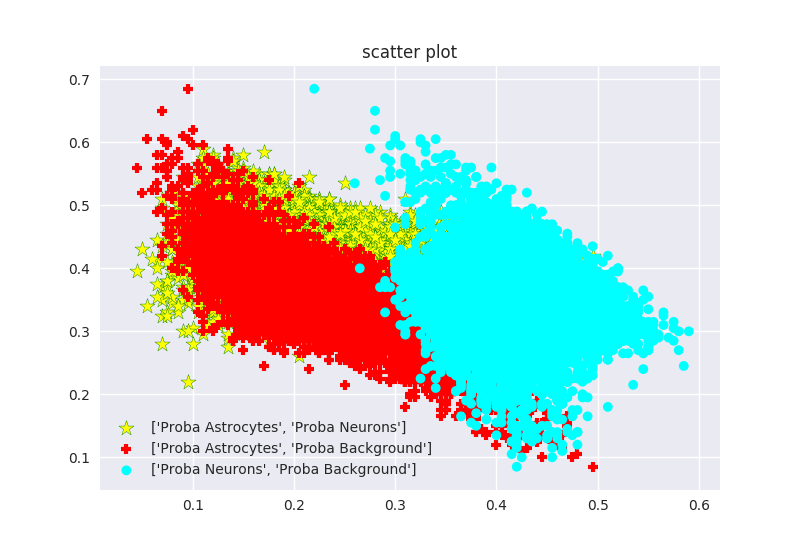

In [108]:
plt.figure()
plt.scatter(Z[:,:,0], Z[:,:,1], s = 130, c = 'yellow', marker = '*', edgecolors = 'green', label=['Proba Astrocytes', 'Proba Neurons'])
plt.scatter(Z[:,:,0], Z[:,:,2], s = 50, c = 'red', marker = '+', linewidth = 3, label=['Proba Astrocytes', 'Proba Background'])
plt.scatter(Z[:,:,1], Z[:,:,2], s = 50, c = 'cyan', marker = 'o', edgecolors = 'none', label=['Proba Neurons', 'Proba Background'])
plt.title('scatter plot')
plt.legend()

In [109]:
import IM_Display_RGB as imd
reload(imd);

In [110]:
imd.imshowRGB(Z,pxobj,10)

/home/tbacoyannis/.local/lib/python2.7/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)
